55
53


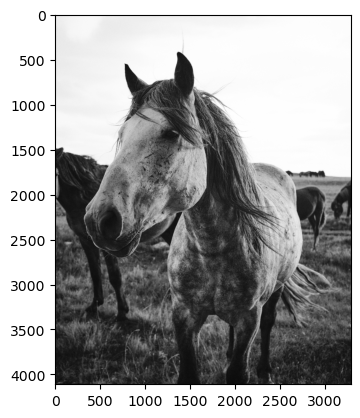

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


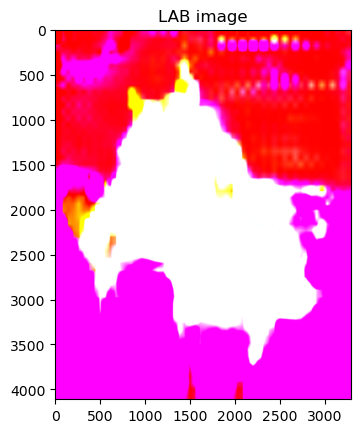

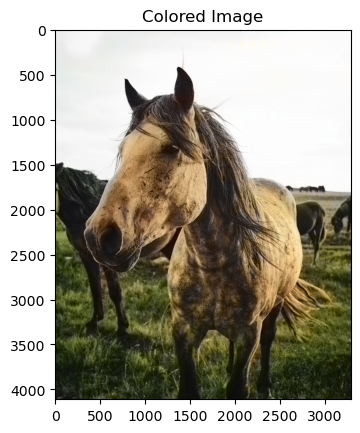

True

In [7]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Name of testing image
image = 'test_sample.jpg'

# Path of our caffemodel, prototxt, and numpy files
prototxt = "C:/Users/Desktop/Downloads/colorization_deploy_v2.prototxt"
caffe_model = "C:/Users/Desktop/Downloads/colorization_release_v2.caffemodel"
pts_npy = "C:/Users/Desktop/Downloads/pts_in_hull.npy"

test_image =  "C:/Users/Desktop/Downloads/opencv test images/horse.jpg"

# Loading our model
net = cv2.dnn.readNetFromCaffe(prototxt, caffe_model)
pts = np.load(pts_npy)
 
layer1 = net.getLayerId("class8_ab")
print(layer1)
layer2 = net.getLayerId("conv8_313_rh")
print(layer2)
pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(layer1).blobs = [pts.astype("float32")]
net.getLayer(layer2).blobs = [np.full([1, 313], 2.606, dtype="float32")]

# Converting the image into RGB and plotting it
# Read image from the path
test_image = cv2.imread(test_image)

# Convert image into gray scale
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Convert image from gray scale to RGB format
test_image = cv2.cvtColor(test_image, cv2.COLOR_GRAY2RGB)

# Check image using matplotlib
plt.imshow(test_image)
plt.show()

# Converting the RGB image into LAB format
# Normalizing the image
normalized = test_image.astype("float32") / 255.0
# Converting the image into LAB
lab_image = cv2.cvtColor(normalized, cv2.COLOR_RGB2LAB)
# Resizing the image
resized = cv2.resize(lab_image, (224, 224))
# Extracting the value of L for LAB image
L = cv2.split(resized)[0]
L -= 50   # OR we can write L = L - 50
# Predicting a and b values
# Setting input
net.setInput(cv2.dnn.blobFromImage(L))
# Finding the values of 'a' and 'b'
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))
# Resizing
ab = cv2.resize(ab, (test_image.shape[1], test_image.shape[0]))
# Combining L, a, and b channels
L = cv2.split(lab_image)[0]
# Combining L,a,b
LAB_colored = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

# Checking the LAB image
plt.imshow(LAB_colored)
plt.title('LAB image')
plt.show()

# Converting LAB image to RGB
RGB_colored = cv2.cvtColor(LAB_colored,cv2.COLOR_LAB2RGB)
# Limits the values in array
RGB_colored = np.clip(RGB_colored, 0, 1)
# Changing the pixel intensity back to [0,255],as we did scaling during pre-processing and converted the pixel intensity to [0,1]
RGB_colored = (255 * RGB_colored).astype("uint8")

# Checking the RGB image
plt.imshow(RGB_colored)
plt.title('Colored Image')
plt.show()

# Saving the colored image
# Converting RGB to BGR
RGB_BGR = cv2.cvtColor(RGB_colored, cv2.COLOR_RGB2BGR)
# Saving the image in desired path
cv2.imwrite("C:/Users/Desktop/Downloads/opencv test images result/"+image, RGB_BGR)